<a href="https://colab.research.google.com/github/Gasca78/inmersion_data_project/blob/main/inmersion_credito_banco_aleman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSIÓN DE DATOS CON PYTHON

## 1. Configuración del Ambiente
Importación de librerias

In [1]:
# prompt: Importa los siguientes módulos con sus respectivos alias: panda, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/Drive')
warnings.filterwarnings('ignore')

Mounted at /content/Drive


## 2. Procesamiento de los Datos

In [2]:
pd.set_option('display.max_columns', None) # Nos permite visualizar todas las columnas, ya que si no estuviera, motraría las primeras 3 y las últimas 3
global df_banco, resultados

In [3]:
df_banco = pd.read_csv('/content/Drive/MyDrive/Inmersión Ciencia de Datos Alura/german_credit.csv')
df_banco.head() # Muestra las 5 primeras filas del archivo, .head es para mostrar la información

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df_banco.shape # Muestra cuantas filas y columnas tiene el archivo (filas, columnas)

(1000, 21)

In [5]:
df_banco.columns # Retorna un índice y existe .info() que da más detalles además de los nombres de las columnas

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df_banco.info() # Los Dtype object son strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [7]:
df_banco.account_check_status.value_counts() # Método para contar los valores que hay de cada una de las categorias en la columna se puede tomar solo el primer índice agregando .index al final

account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: count, dtype: int64

In [8]:
df_banco.account_check_status.value_counts().index # Retorna un índice y existe .info() que da más detalles además de los nombres de las columnas

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [9]:
columnas = list(df_banco.select_dtypes(include=['object']).columns) # Crear una lista donde solo las columnas con valores tipo objeto sean seleccionadas
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [10]:
dic = {'yes':1, 'no':0}
df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)  # .map() método para asignar el valor asociado a la llave
df_banco['foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [11]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco # Para garantizar que no haya registros duplicados
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco # Para garantizar que no hay ningún registro null

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

In [12]:
procesar_datos()
df_banco.sample(3) # Para motrar 3 filas aleatorias

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
949,1,4,24,3,5,3621,4,1,2,3,1,4,3,31,3,2,2,3,1,0,1
648,1,3,24,3,1,947,5,2,4,3,1,3,4,38,1,3,1,3,2,0,1
919,1,1,24,3,4,3345,5,1,4,3,1,2,2,39,3,1,1,4,1,1,1


## 3. Exploración de los Datos

In [13]:
variables_discretas = ['personal_status_sex', 'age',
                       'duration_in_month', 'credit_amount', 'default'] # personal_status_sex es un atributo que indica si la persona esta casada, es viuda, divorciada o si es hombre o mujer
df_banco[variables_discretas].tail(3) # al poner la variable 'variables_discretas' indicamos que en nuetro df_banco solo queremos tomar las columnas de esa variable en nuestro data frame, el método .tail() muestra los últimos valores

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


dic_sexo = {2:1,5:1,1:0,3:0,4:0}

df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

Creamos una nueva columna donde hacemos la separación de la clave 'personal_status_sex' a solo hombre y mujeres, ubicando esta nueva conversión en una columna llamada 'sexo'

Tenemos ya una función para realizar este proceso con las variables que queremos volver discretas, llamada feature_engineering(), donde además de hacer las clasificaciones y rangos para los diferentes atributos, eliminamos las columnas que ya no serán necesarias

In [14]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'], # .cut() método de Pandas que nos permite establecer rangos de valores através de bims (porciones o rangos pre-establecidos)
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [15]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [16]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


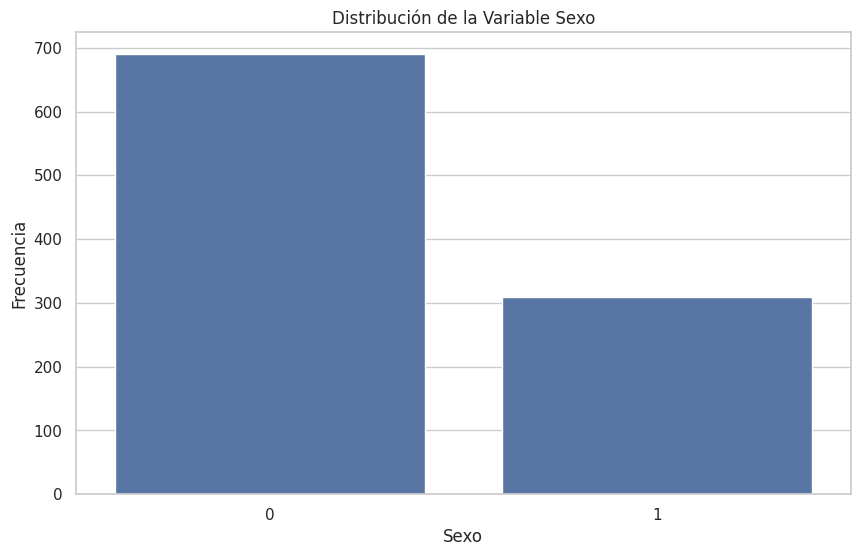

In [17]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar el histograma
# sns.histplot(data=df_banco, x='sexo', discrete=True, kde=False) Aquí usa la función histplot
sns.countplot(data=df_banco, x='sexo') # Acá trabajamos como en el vídeo con la función countplot

# Configurar los títulos y etiquetas
plt.title('Distribución de la Variable Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [18]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

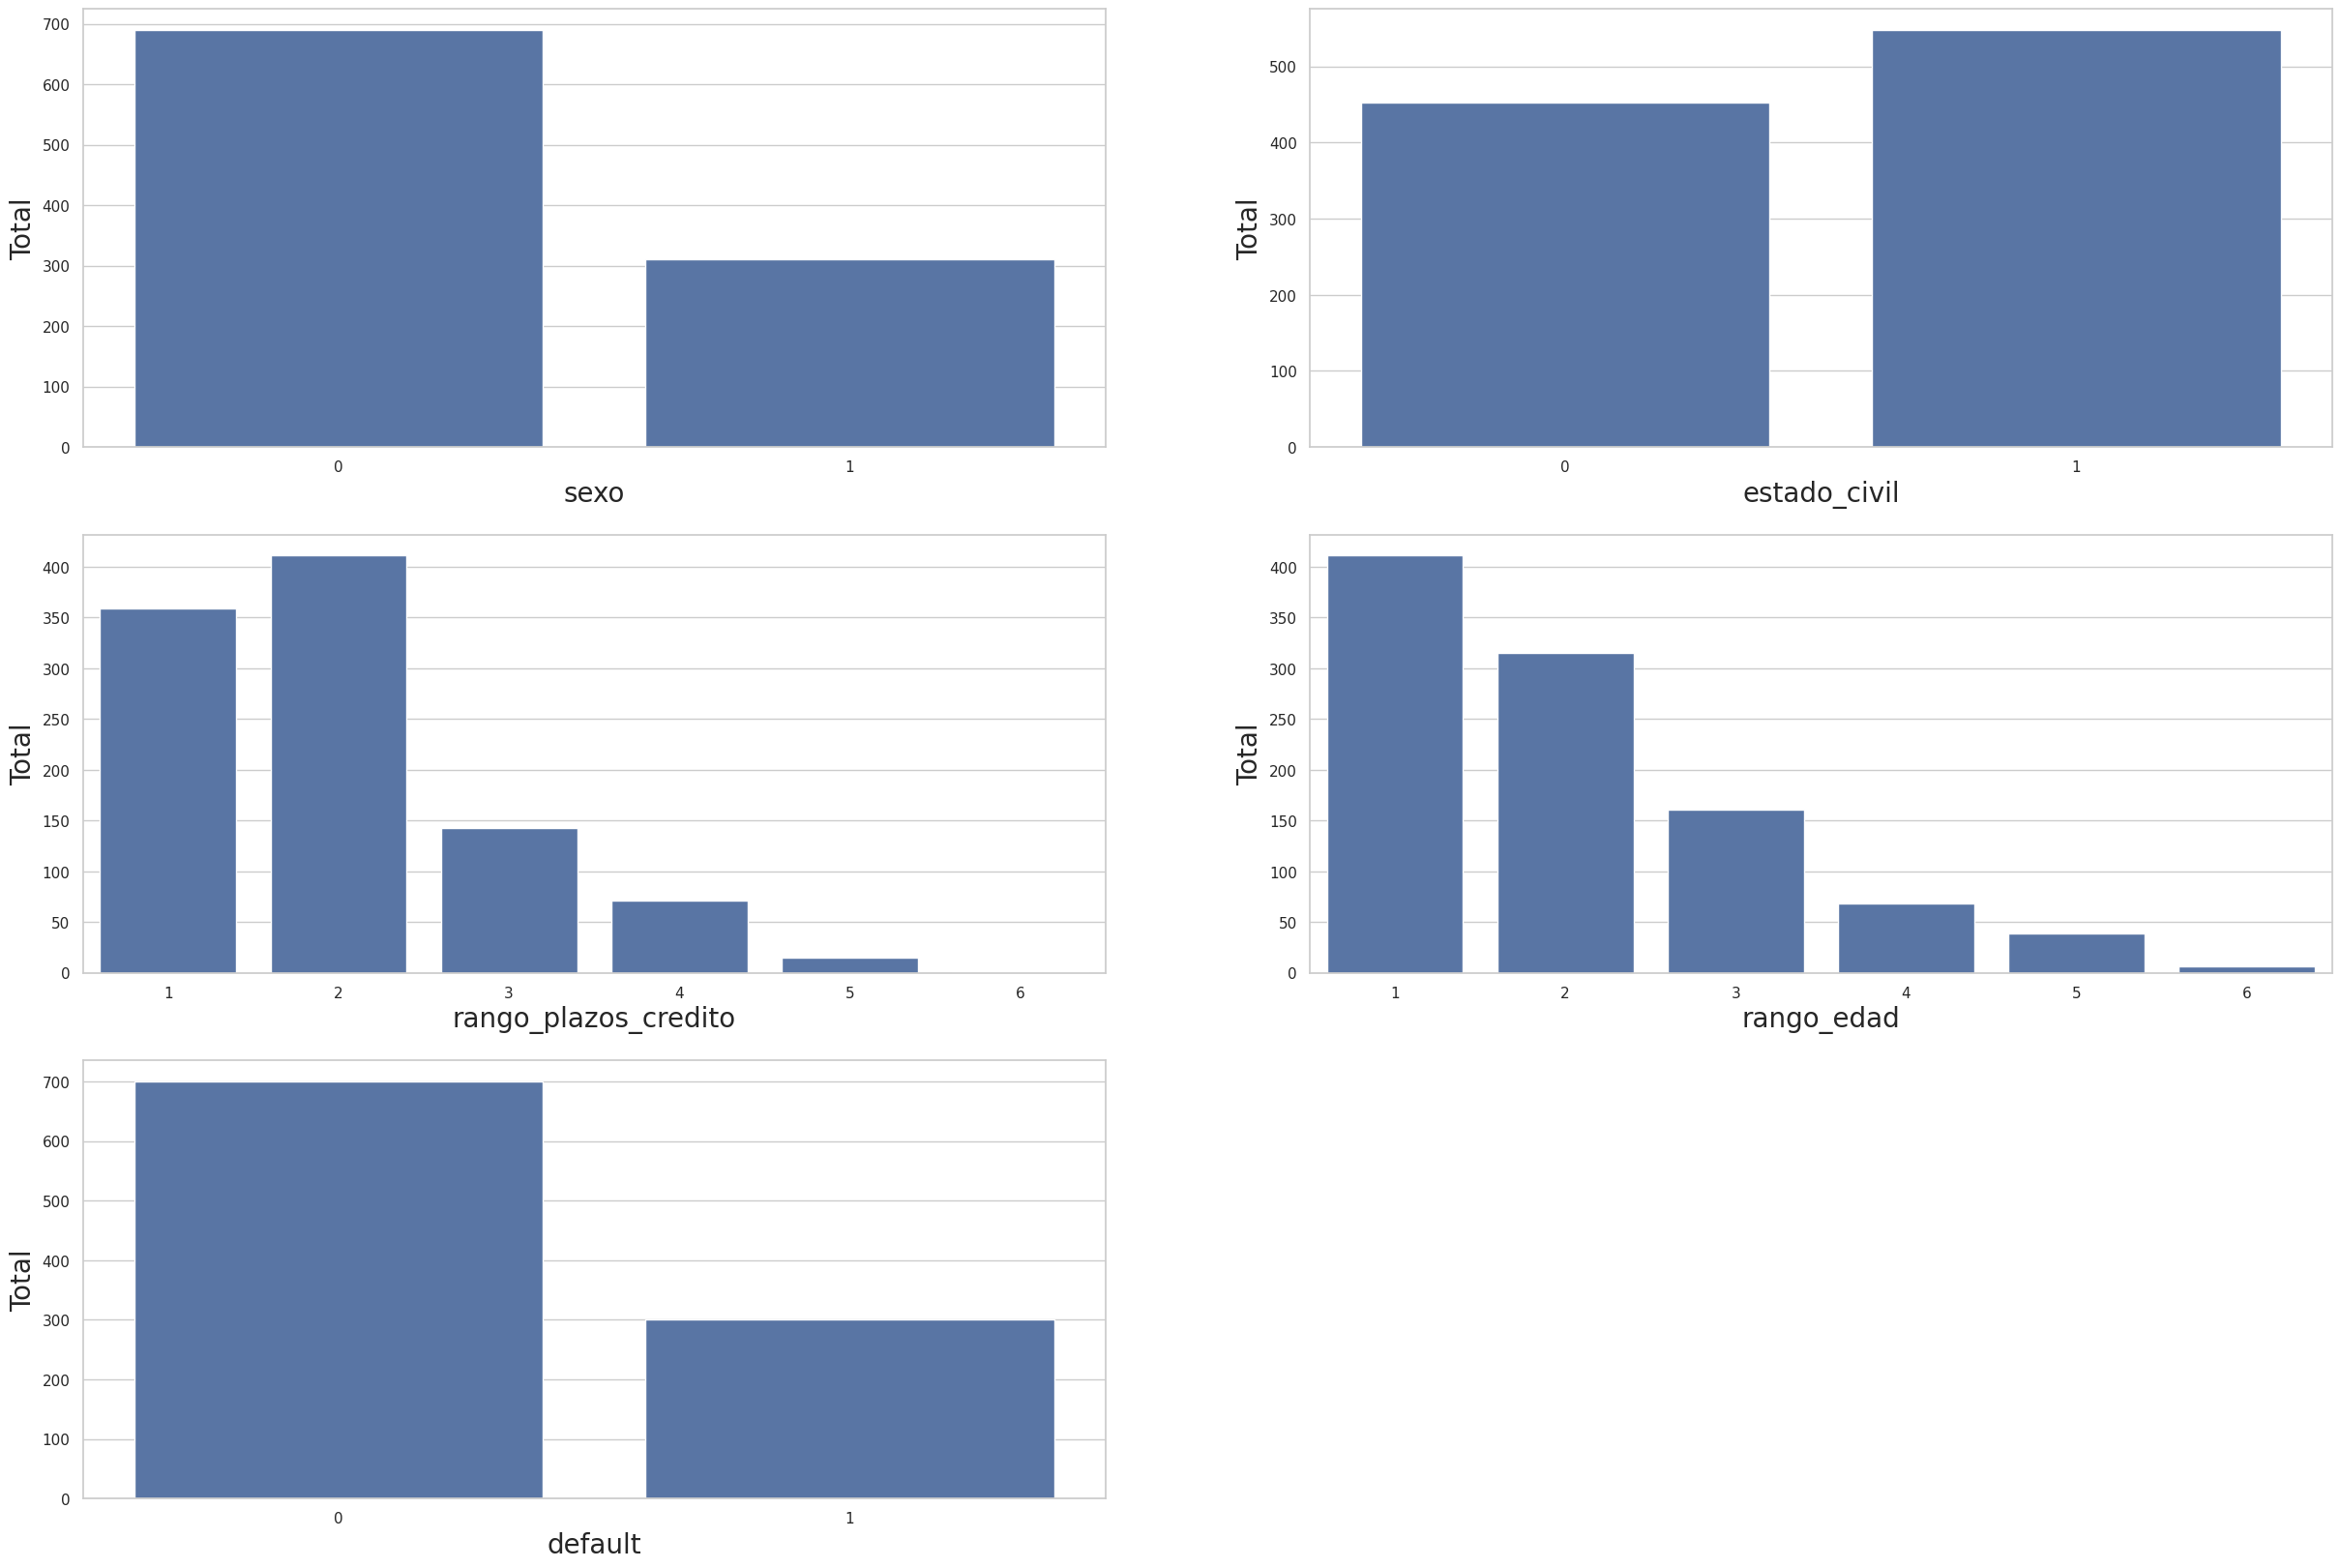

In [19]:
analisis_exploratorio()

## Desafío Día 1
1. Analizar los datos de las distribuciones e identificar si hay algún valor o registro que no se deben considerar para el modelo.
2. Investigar qué es y cómo crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

### Desafío 1. Analisis de datos

#### Histograma de todos los campos


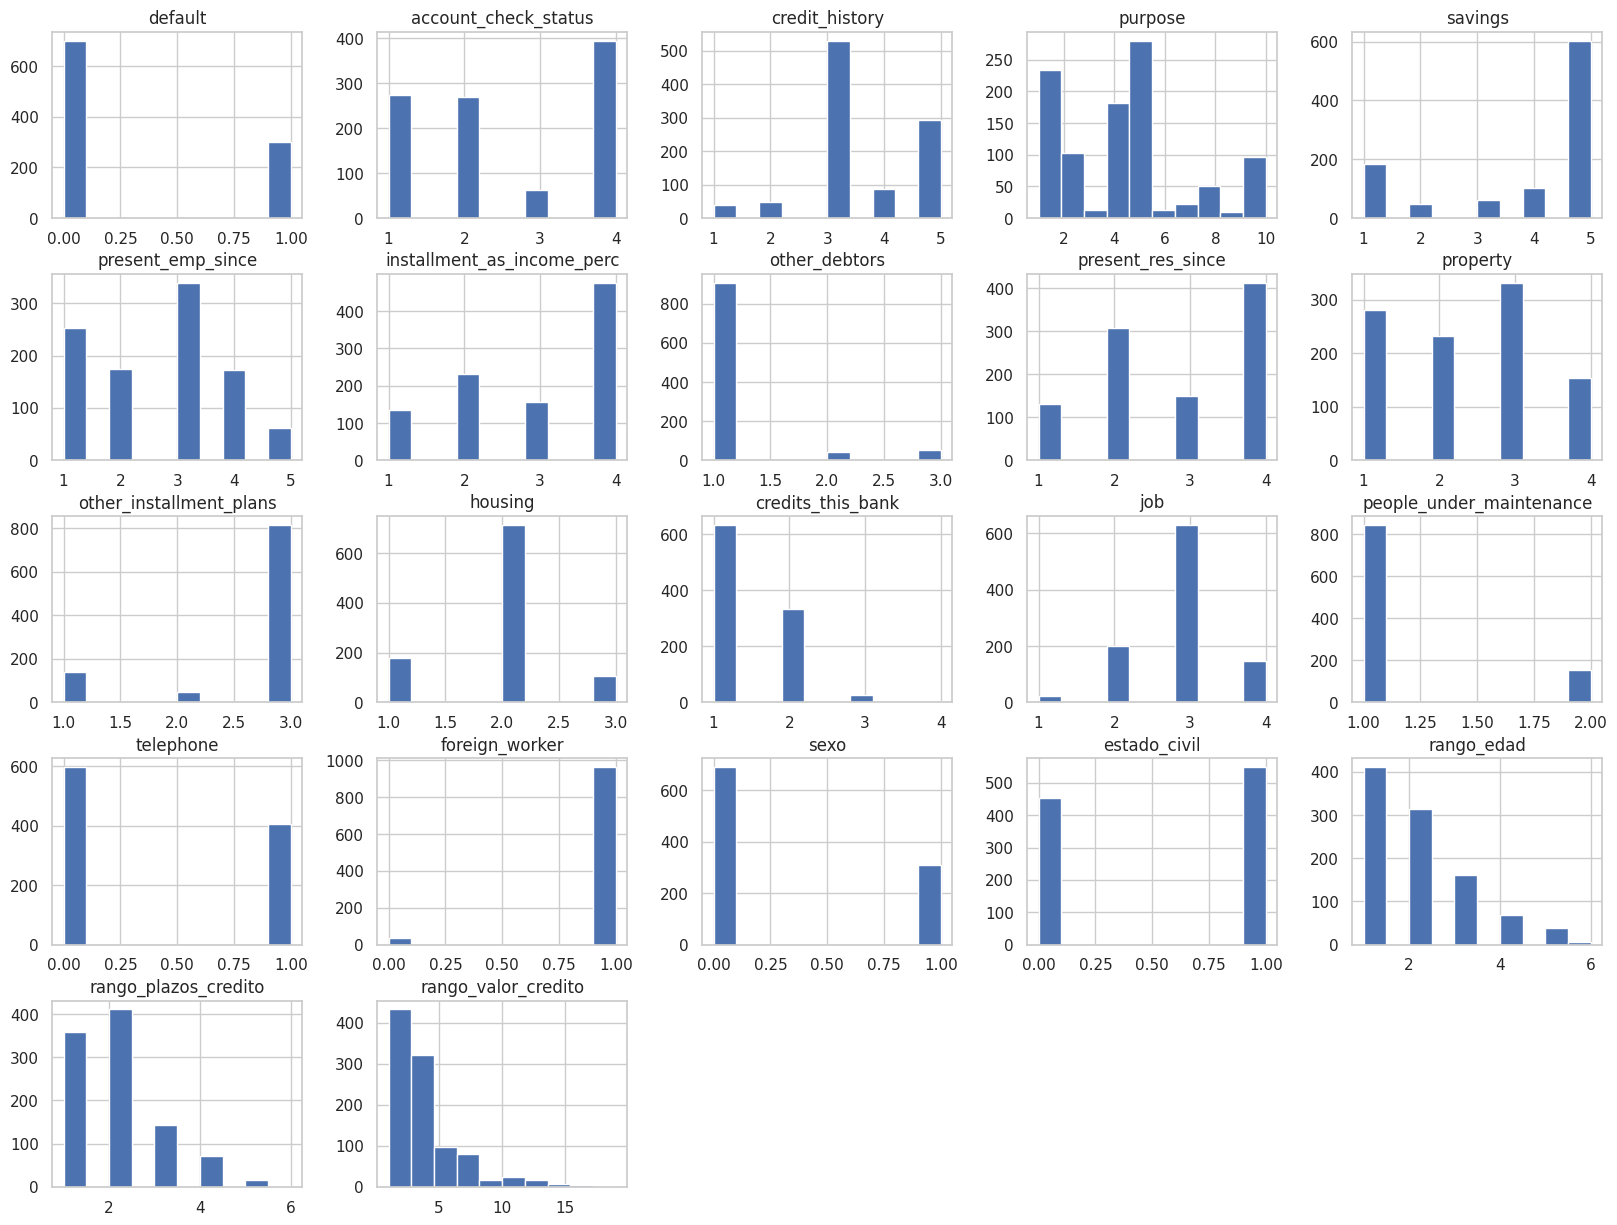

In [20]:
# Visualización de histogramas para todas las variables
df_banco.hist(figsize=(20, 15))
plt.show()

#### Resumen estadístico de cada campo

In [21]:
# Resumen estadístico
print(df_banco.describe())

           default  account_check_status  credit_history      purpose  \
count  1000.000000           1000.000000      1000.00000  1000.000000   
mean      0.300000              2.577000         3.54500     4.277000   
std       0.458487              1.257638         1.08312     2.739302   
min       0.000000              1.000000         1.00000     1.000000   
25%       0.000000              1.000000         3.00000     2.000000   
50%       0.000000              2.000000         3.00000     4.000000   
75%       1.000000              4.000000         5.00000     5.000000   
max       1.000000              4.000000         5.00000    10.000000   

           savings  present_emp_since  installment_as_income_perc  \
count  1000.000000        1000.000000                 1000.000000   
mean      3.895000           2.616000                    2.973000   
std       1.580023           1.208306                    1.118715   
min       1.000000           1.000000                    1.000000 

#### Boxplot de cada campo (diagrama de caja y bigotes)


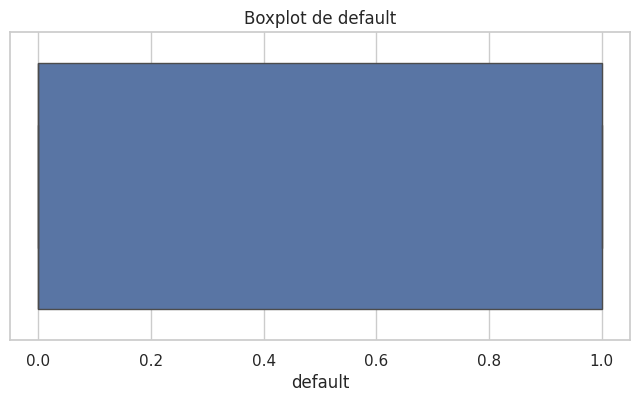

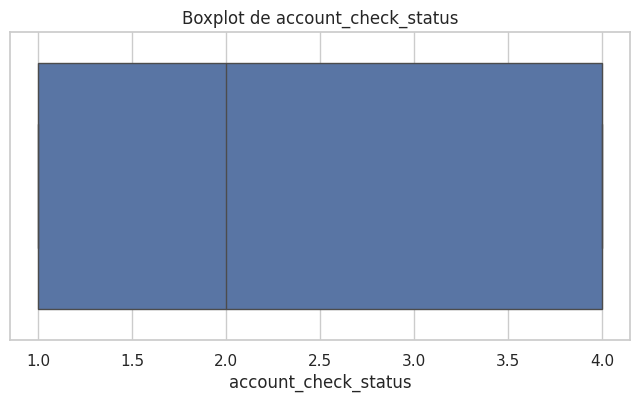

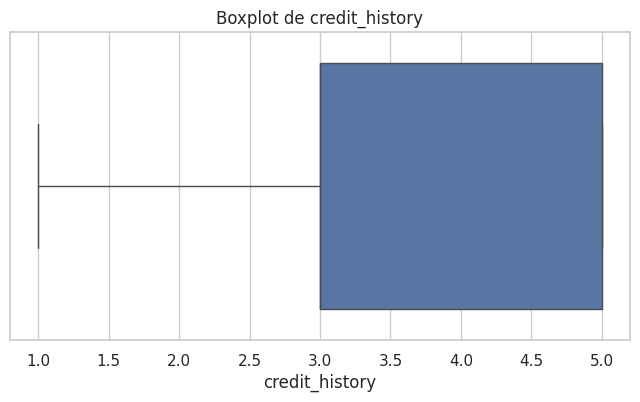

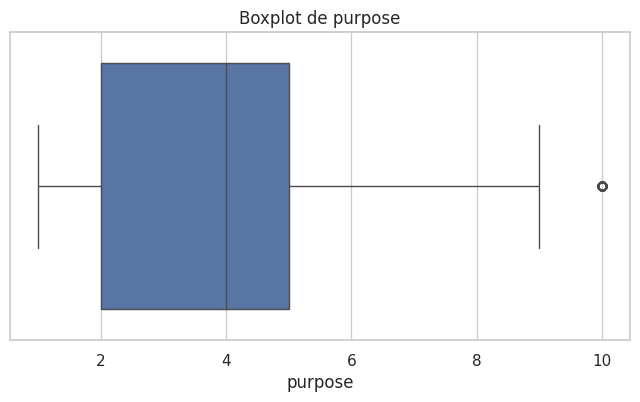

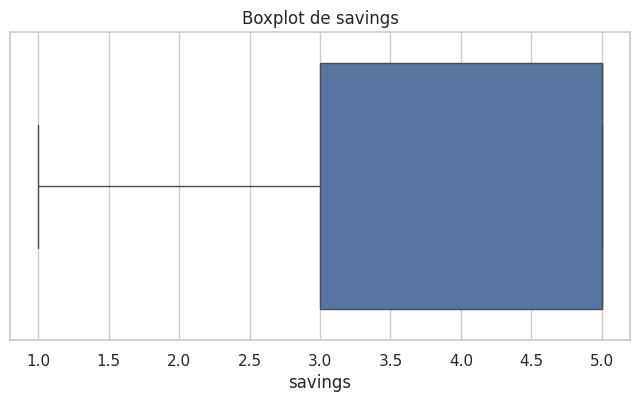

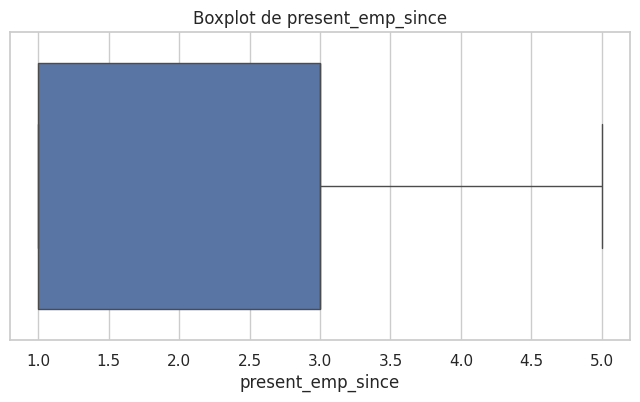

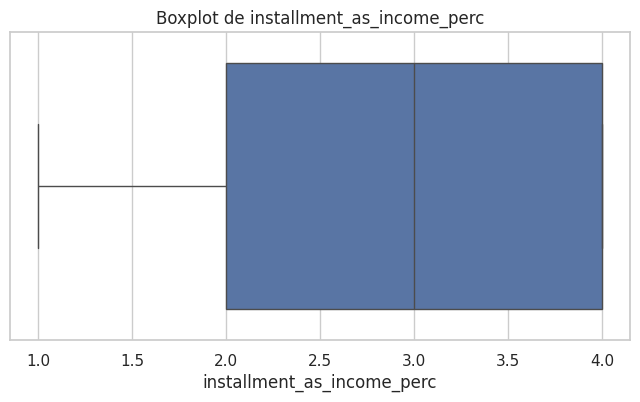

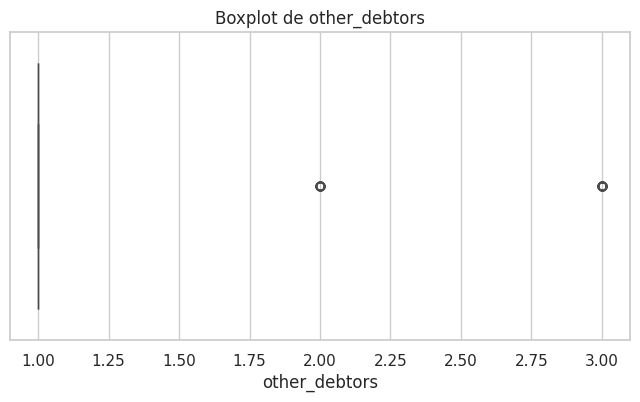

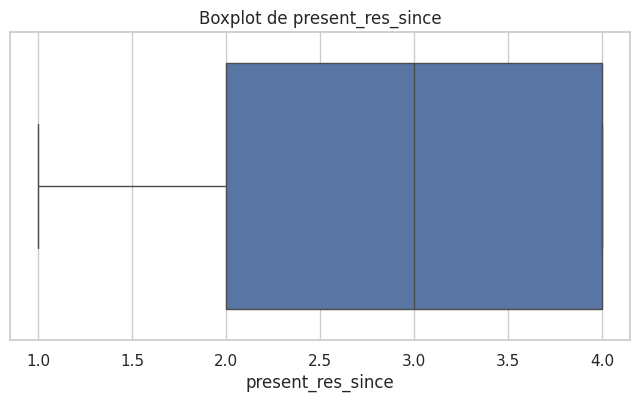

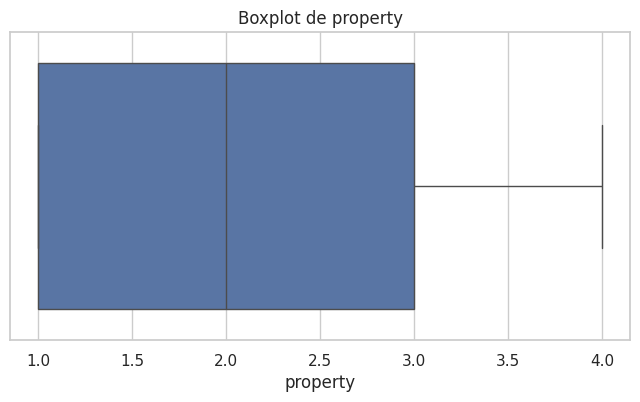

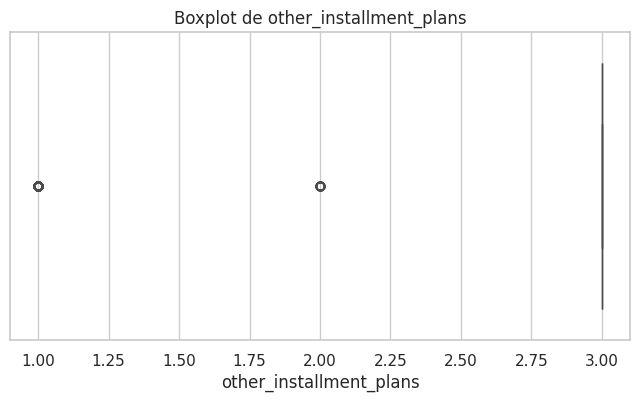

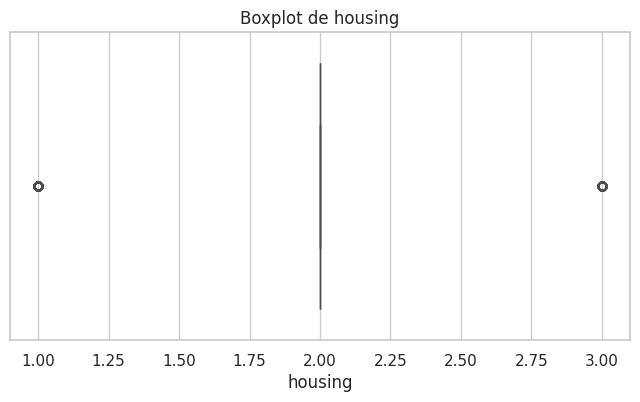

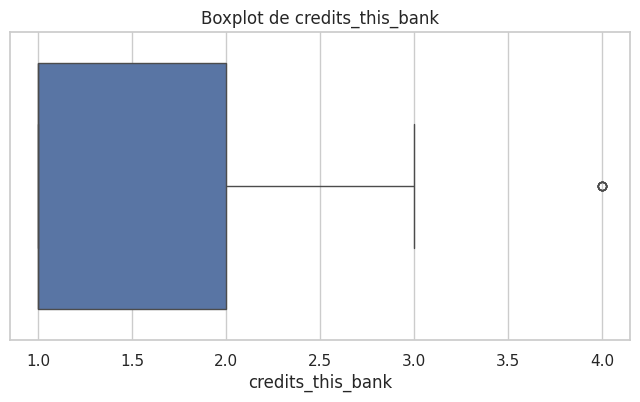

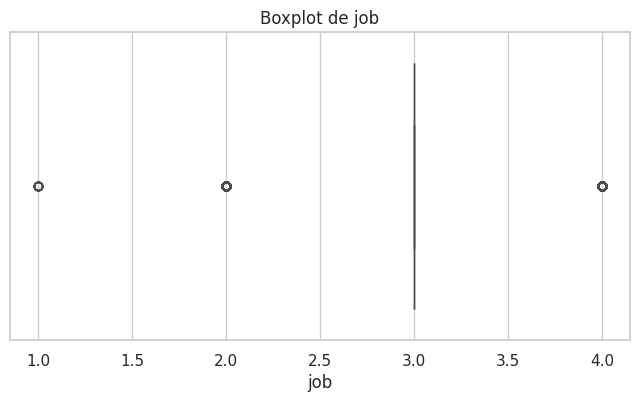

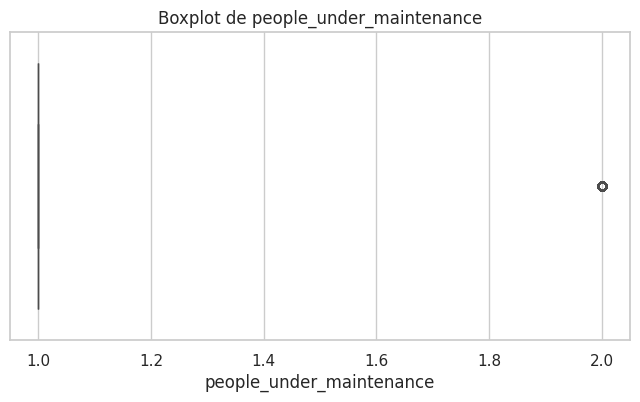

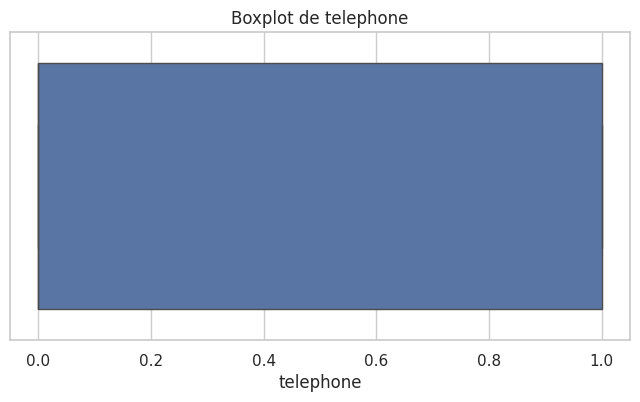

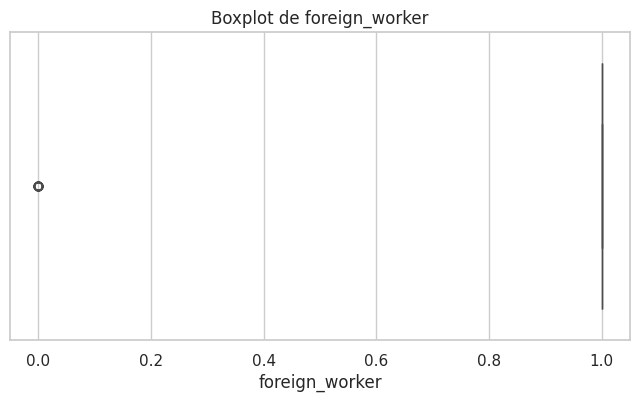

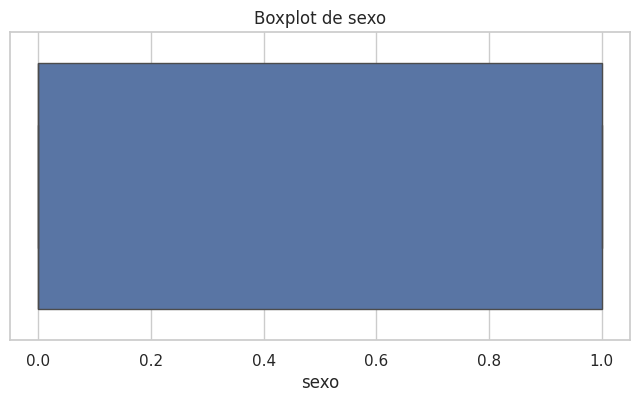

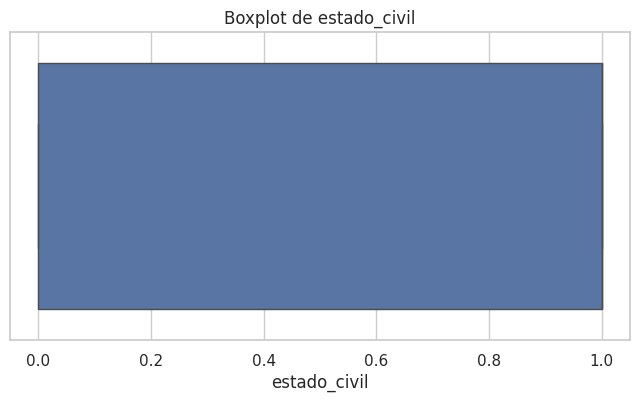

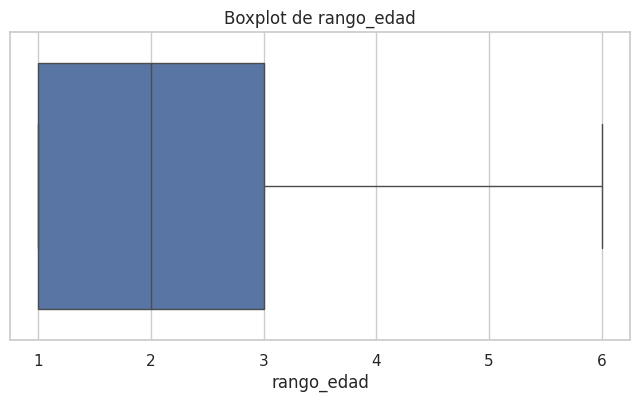

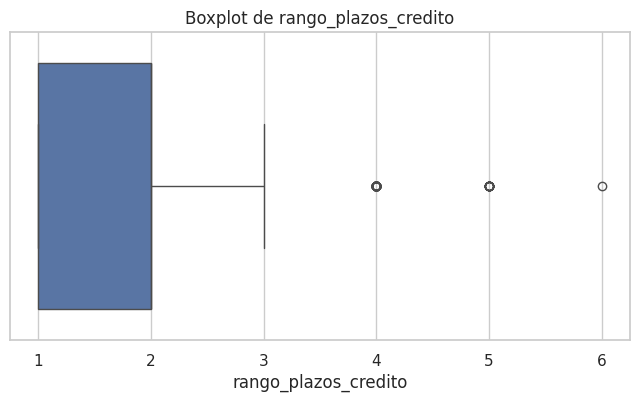

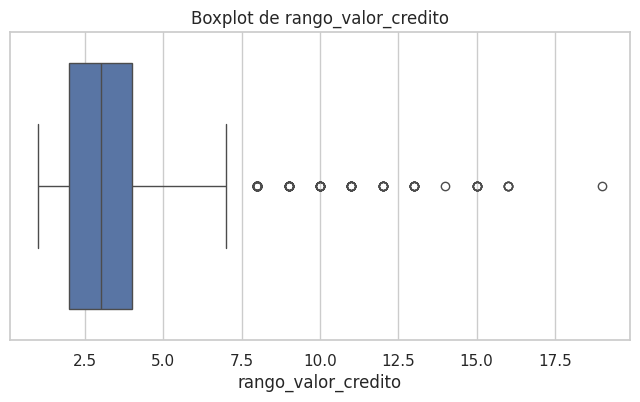

In [22]:
# Visualización de boxplots para detectar outliers
for column in df_banco.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_banco[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

Para poder analizar de una forma más completa los datos que tenemos, decidí realizar el histograma de todos los campos y sus respectivos diagrama caja y bigotes, los cuales me permiten poder visualizar de una manera más sencilla cómo es la distribución de los valores, pudiendo tener las siguientes conclusiones:

- 10 de los 22 campos cuentan con outliers, quiere decir que tiene datos atípicos:
 - Purpouse
 - Other debtors
 - Other installment plans
 - Housing
 - Credits this bank
 - Job
 - People under maintenance
 - Foreign worker
 - Rango plazos crédito (duration in month)
 - Rango valor crédito (credit amount)
- Siendo así, que gracias a los boxplot (diagrama caja y bigotes), busque enfocarme en los campos anteriormente descritos basado en sus histogramas y cuales son los valores que lo integran, encontrando lo siguiente:
 - Purpouse: no hay propósitos fuera de las clasificaciones predefinidas para en este campo, por lo que es innecesario contar con esa opción.
 - Other debtors: no hay casi ningún otro tipo de deudor como co-applicant o guarantor, por lo que prescindir de esos valores puede que no varie mucho en las posibles respuestas que de sus futuros análisis.
 - Other installment plans: Aquí los valores atípicos son pagos con otros planes, siendo que no suele manejarse así, aunque considero tener esa opción no alteraría mucho los futuros análisis.
 - Housing: En vivienda nos indican que son pocos los que rentan o están "libres", pero desde mi perspectiva, aunque no sean muchos valores en comparación con los que tienen su casa propia, es importante sí contar con esa información ya que te permite saber sus diferentes condiciones que podrían "interferir" en sus pagos.
 - Credits this bank: Se lográ observar que son mínimos la cantidad de personas que tienen más de 3 créditos, pudiendo prescindir de esas opciones.
 - Job: Son pocos los valores de personas desempleadas, pero es información que también considero es importante tener en cuenta por lo que no podría tratar de prescindir de estos valores.
 - People under maintenance: En este caso, aunque si es una amplia diferencia entre las personas que tienen a una sola persona que mantener a las que tienen 2, la cantidad no es muy baja como para poder considerar no contar con esa información.
 - Foreign worker: Para este campo, aunque la muestra de personas no foráneas es muy baja, creo que sigue siendo importante mantener esa información.
 - Rango plazos crédito (duration in month): En este campo son muy pocos los créditos de más de 4 años, por lo que podríamos juntar toda esa cantidad en un solo rango o no tomar en cuenta los créditos de 6 años por ejemplo, que son muy pocos.
 - Rango valor crédito (credit amount): Similar al campo anterior, los créditos altos son la minoría, pudiendo buscar definir nuevos rangos aunque no prescindiria de los datos.

### Desafío 2. Mapa de Calor


#### Qué es un mapa de calor:

Un mapa de calor es una representación gráfica que muestra la magnitud de un fenómeno mediante el uso de colores en una matriz. En análisis de datos, los mapas de calor suelen utilizarse para visualizar la correlación entre variables.



#### Pasos para crear un mapa de calor:

- Calcular la matriz de correlación: Usa el método corr() de Pandas para obtener la matriz de correlación de las variables.
- Crear el mapa de calor: Usa heatmap de Seaborn para graficar la matriz de correlación.

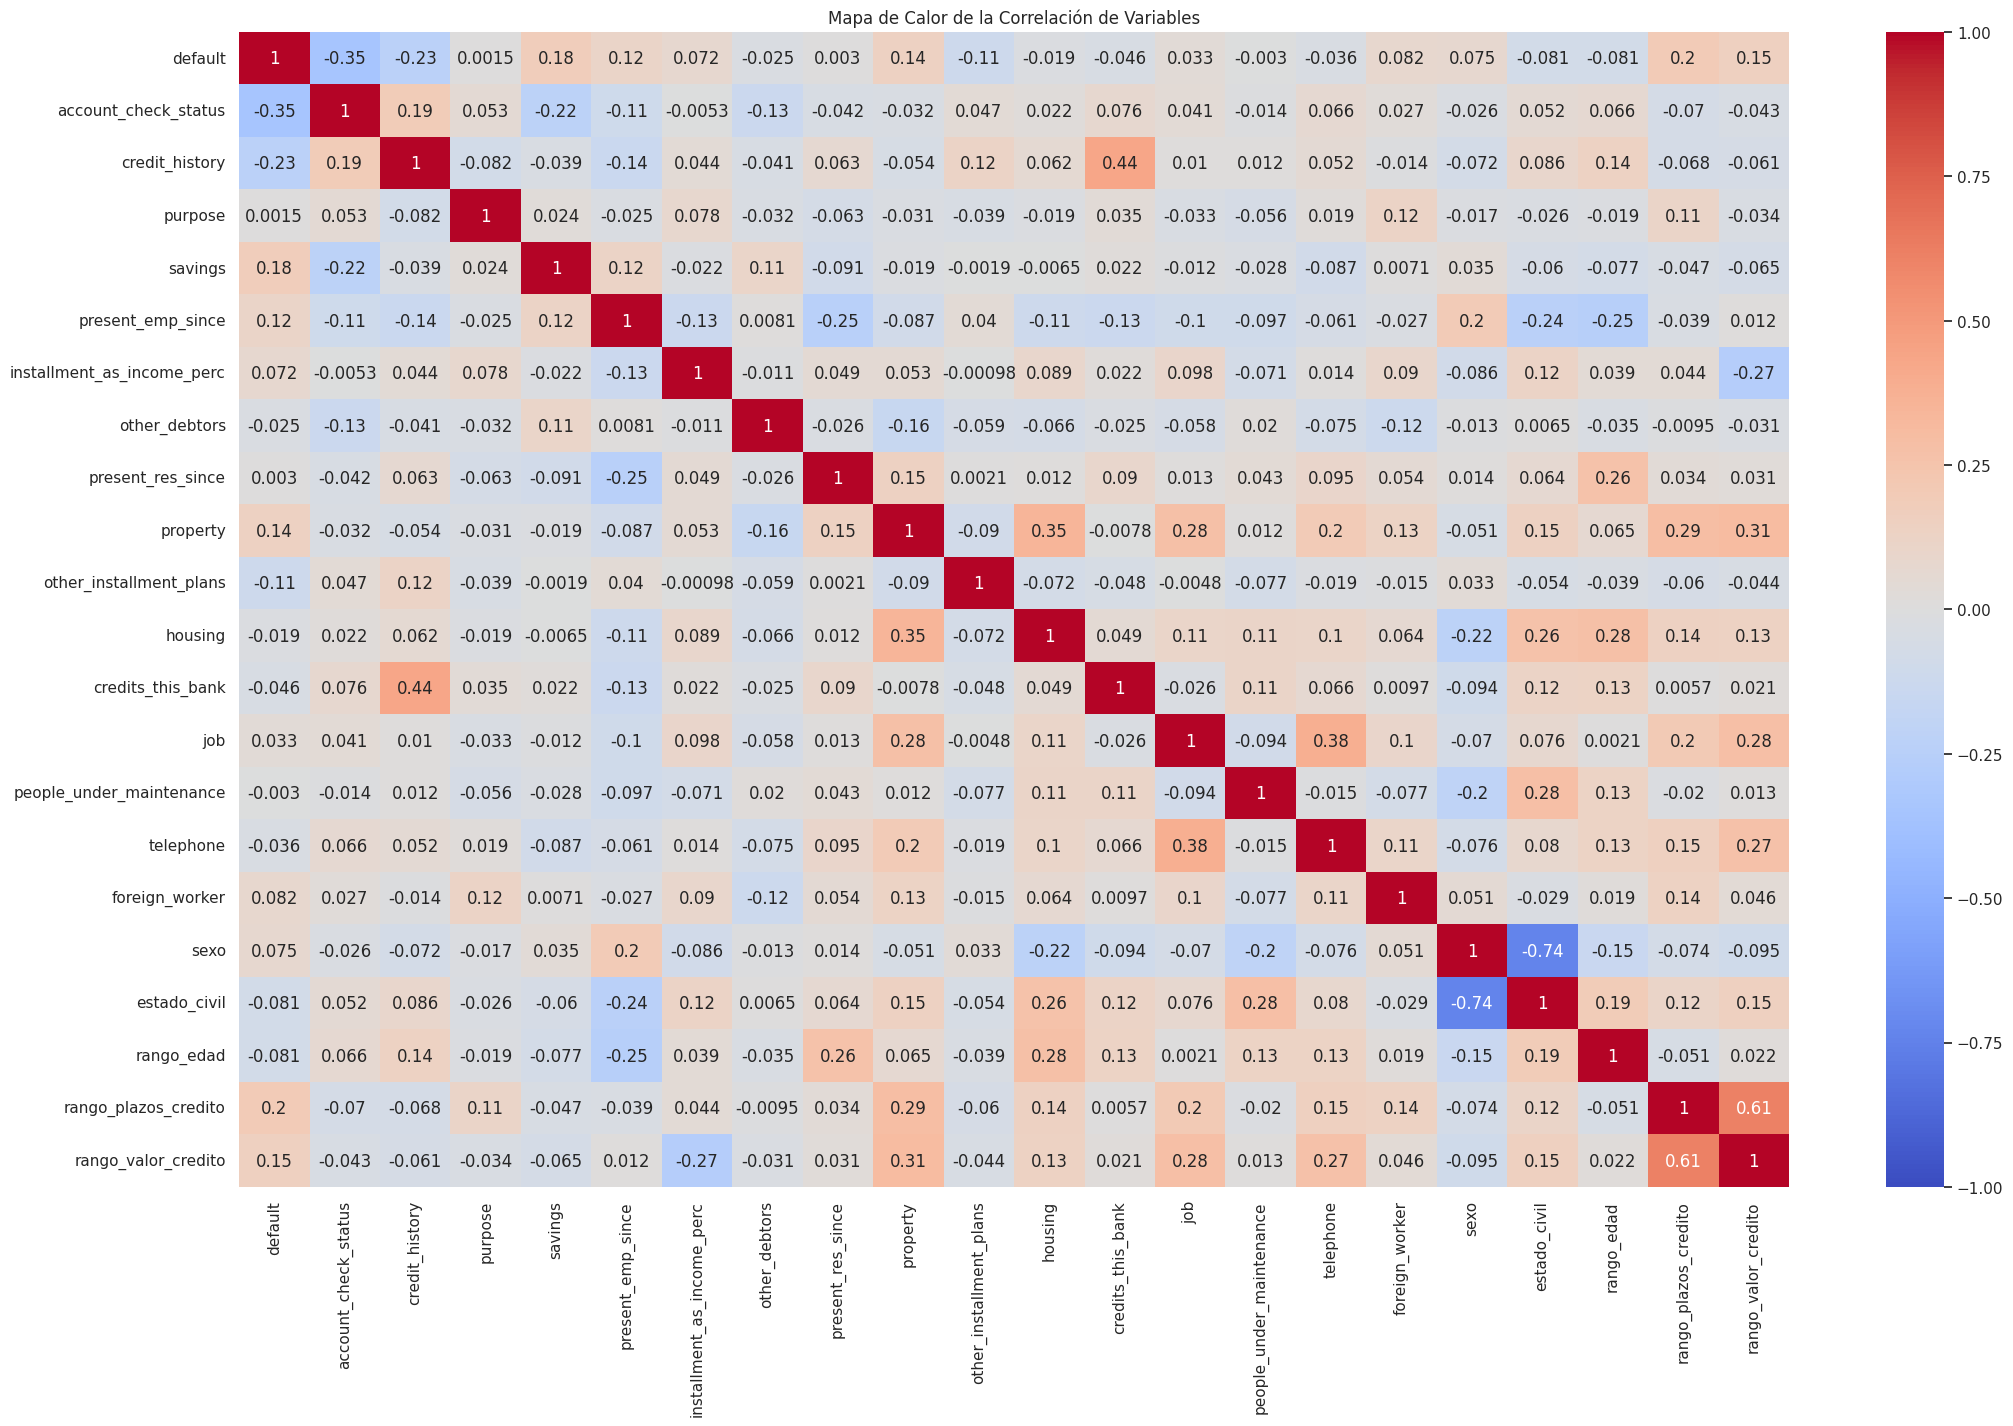

In [23]:
# Calcular la matriz de correlación
correlation_matrix = df_banco.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación de Variables')
plt.show()

### Desafío 3. Conclusión de los histogramas


- Default: El 70% de las personas que tramitan un crédito son buenos clientes, eso nos puede indicar que en general un futuro cliente puede tender a pagar sus créditos.
- Account_check_status: La mayoría de los clientes no tienen una cuenta previa o tienen cuentas menores a 200 DM.
- Credit history: Poco más del 50 % de los clientes tienen todos su créditos pagados correctamente y poco más del 25% tienen créditos con otros bancos.
- Purpouse: Los propósitos por los que más se sacan créditos son por aplicaciónes domésticas o comprar un auto nuevo, mientras que mantenimiento y reparaciones son los propósitos por los que menos se sacan créditos
- Savings: Un 60% de los clientes no manejan cuenta de ahorro lo cual considero primero como un área de oportunidad y en segundo lugar que es un punto importante a tener en cuenta.
- Prest emp since: Solo un 5% de los clientes son desempleados y la mayoría de los empleados tienen mínimo más de un año en sus trabajos.
- Installment as income perc: El 50% de los clientes tienen una tasa de pago a plazos de 4.
- Other debtors: Solo hay un 10% del tipo deudor co-applicant o guarantor.
- Present res since: Más de la mitad de los clientes residen desde hace más de 2 años y la mayoría de ellos lleva ya 4 años en la residencia.
- Property: El campo más "balanceado" donde tener un auto o un inmueble es el caso más frecuente.
- Other installment plans: Aquí los valores atípicos son pagos con otros planes, siendo que no suele manejarse así siendo que poco más del 80% no cuenta con algún otro plan.
- Housing: Aproximadamente el 70% de los clientes tienen casa propia.
- Credits this bank: Poco más 60% de los clientes ya cuentan con un crédito en el banco.
- Job: Más del 50% de las personas cuentan con empleo lo cual considero es un determinante al momento de definir si sería un buen cliente potencial, teniendo su correcta relación con el 70% de los buenos clientes.
- People under maintenance: Más del 80% de las personas cuentan solo con una persona para mantener.
- Telephone: En su mayoría los clientes no tienen teléfono registrado, siendo este un dato que me parece deberíad de tener un poco más de foco.
- Foreign worker: Casi en su totalidad de los clientes son foráneos.
- Sexo: En su mayoría los clientes son hombres.
- Estado civil: Son más las personas casadas/viudas/divorciadas que personas solteras, pero no habiendo una amplia diferencia en la cantidad de personas.
- Rango edad: Más del 70% de personas son clientes que tienen entre 18 y 40 años.
- Rango plazos crédito (duration in month): Más del 70% de los clientes tienen un plazo de crédito de 12 o 24 meses.
- Rango valor crédito (credit amount): Los valores de los créditos, para poco más del 70% se manejan en montos bajos, siendo los menores de 2000 DM los más vistos.

## 4. Construcción de Modelos


In [24]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


In [25]:
# prompt: ejemplo de modelo de machine learning de clasificación

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1) # Atributos a tomar en cuenta para el modelo
y = df_banco['default'] # Target X -> y, X explica y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size es para indicar el % de valores que se tomarán para evaluación y el otro porcentaje se irá a entrenamiento
# random_state se utiliza para indicar un valor específico y así poder tener un resultado esperado estático

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train) # Creará una función matemática que explique "y"

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")


Precisión del modelo: 0.795


In [26]:
#@title
def crea_modelos(y,x):
  global resultados
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [27]:
y = df_banco['default']
x = df_banco.drop(columns='default')
crea_modelos(y,x)
for i, model in enumerate(resultados['Model']):
  print(model)
  print(f'Accuracy: {resultados["Accuracy"][i]}')
  print(f'Precision: {resultados["Precision"][i]}')
  print(f'Recall: {resultados["Recall"][i]}')
  print(f'F1-score: {resultados["F1-score"][i]}')
  print(f'AUC-ROC: {resultados["AUC-ROC"][i]}')
  print('\n')

Regresión Logística
Accuracy: 0.78
Precision: 0.6785714285714286
Recall: 0.4418604651162791
F1-score: 0.5352112676056338
AUC-ROC: 0.799934796783308


Árbol de Decisión
Accuracy: 0.71
Precision: 0.49411764705882355
Recall: 0.4883720930232558
F1-score: 0.49122807017543857
AUC-ROC: 0.6437187567920017


Random Forest
Accuracy: 0.79
Precision: 0.7169811320754716
Recall: 0.4418604651162791
F1-score: 0.5467625899280576
AUC-ROC: 0.7965387959139317


Naive Bayes
Accuracy: 0.74
Precision: 0.5465116279069767
Recall: 0.5465116279069767
F1-score: 0.5465116279069767
AUC-ROC: 0.7800478156922409




## 5. Evaluación y Selección de Modelo

In [28]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados) # Convertir la variable `resultados`en un dataframe para su correcta graficación
  results_df.set_index('Model', inplace=True) # Aquí indicamos que queremos que en cada índice se muestre el nombre del modelo

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T # Aquí se realiza la transpuesta
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout() # Método para "apretar" el gráfico (no dejar tanto espacio vacío)
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

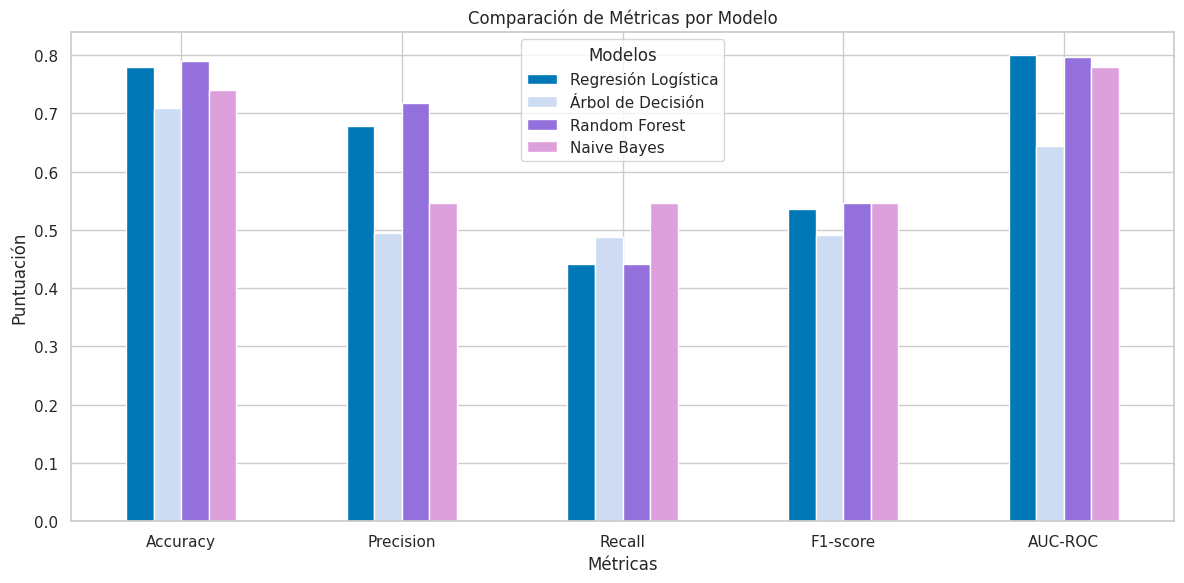

In [29]:
visualiza_resultados()

## Desafíos Día 2
1. Evaluar la Matriz de Confusión
2. Balancear la variable target
3. Seleccionar sólo algunas variable y reevaluar

### Desafío 1. Evaluar la Matriz de Confusión


In [30]:
def evalua_crea_modelos(y,x):
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)

      # Calcular la matriz de confusión
      matriz_confusion = confusion_matrix(test_y, predictions)

      # Visualizar la matriz de confusión
      disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)
      disp.plot(cmap='viridis')
      disp.ax_.set_title(f'Matriz de Confusión - {name}')
      plt.show()

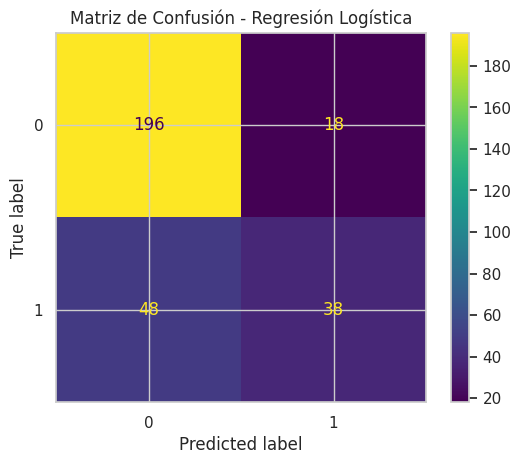

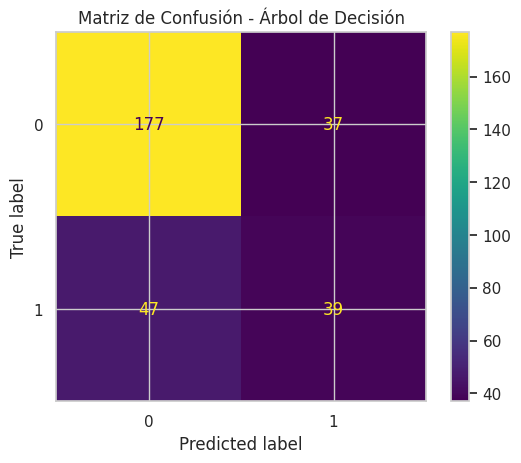

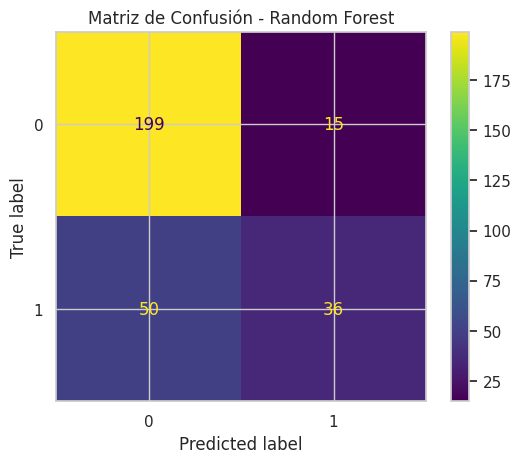

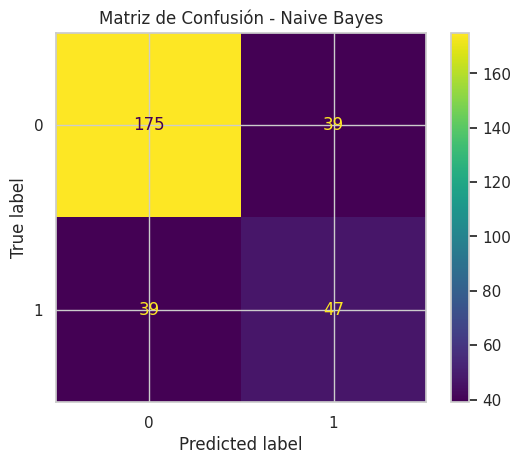

In [31]:
evalua_crea_modelos(y,x)

### Desafío 2. Balanceo de la variable target

In [32]:
def balancea_target(y,x):
  smote = SMOTE(random_state=42)
  x_balanced, y_balanced = smote.fit_resample(x, y)

  return x_balanced, y_balanced

In [33]:
x_balanced, y_balanced = balancea_target(y,x)
print("Distribución de clases original")
print(y.value_counts())
print("Distribución de clases balanceadas después de SMOTE")
print(y_balanced.value_counts())

Distribución de clases original
default
0    700
1    300
Name: count, dtype: int64
Distribución de clases balanceadas después de SMOTE
default
0    700
1    700
Name: count, dtype: int64


In [34]:
crea_modelos(y_balanced,x_balanced)
for i, model in enumerate(resultados['Model']):
  print(model)
  print(f'Accuracy: {resultados["Accuracy"][i]}')
  print(f'Precision: {resultados["Precision"][i]}')
  print(f'Recall: {resultados["Recall"][i]}')
  print(f'F1-score: {resultados["F1-score"][i]}')
  print(f'AUC-ROC: {resultados["AUC-ROC"][i]}')
  print('\n')

Regresión Logística
Accuracy: 0.7761904761904762
Precision: 0.7429906542056075
Recall: 0.803030303030303
F1-score: 0.7718446601941747
AUC-ROC: 0.8519428519428519


Árbol de Decisión
Accuracy: 0.7214285714285714
Precision: 0.6832579185520362
Recall: 0.7626262626262627
F1-score: 0.720763723150358
AUC-ROC: 0.7236554736554737


Random Forest
Accuracy: 0.8071428571428572
Precision: 0.7799043062200957
Recall: 0.8232323232323232
F1-score: 0.8009828009828011
AUC-ROC: 0.8998657748657749


Naive Bayes
Accuracy: 0.7142857142857143
Precision: 0.6585365853658537
Recall: 0.8181818181818182
F1-score: 0.7297297297297297
AUC-ROC: 0.8036900536900536




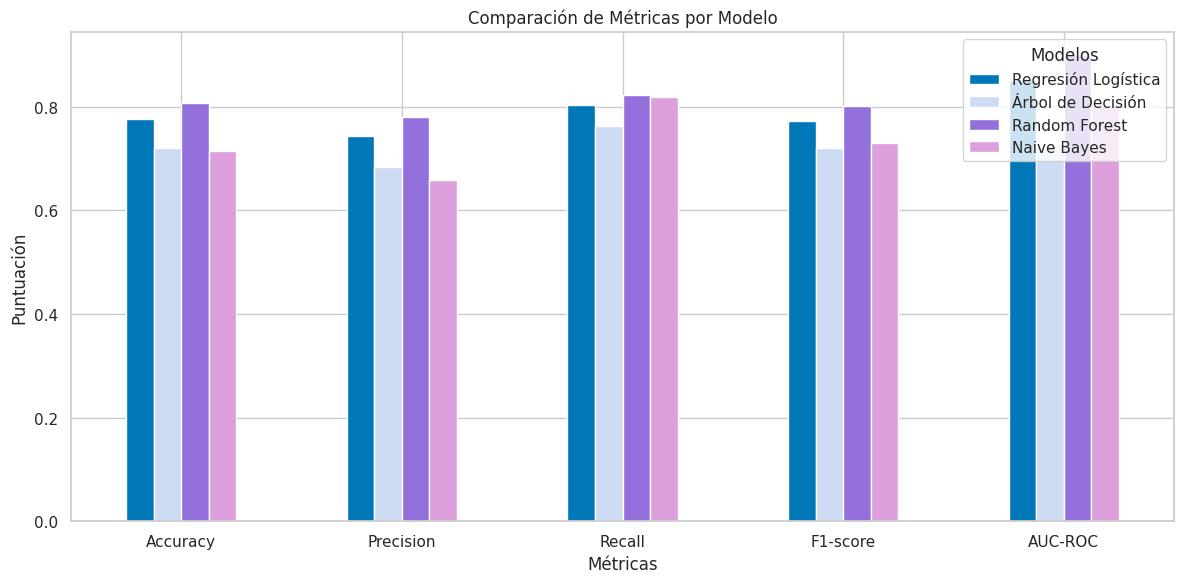

In [35]:
visualiza_resultados()

### Desafío 3. Seleccionar sólo algunas variables y reevaluar


In [36]:
# Creamos el nuevo dataframe usando solo 12 campos de los 22 disponibles
new_df_banco = df_banco[['default','account_check_status','credit_history','savings','present_emp_since','installment_as_income_perc','property','housing','job','rango_edad','rango_plazos_credito','rango_valor_credito']]

In [37]:
# Creamos las variables x e y para poder hacer la creación del modelo
y2 = new_df_banco['default']
x2 = new_df_banco.drop(columns='default')
# Creamos el modelo de este nuevo dataframe reducido
crea_modelos(y2,x2)
for i, model in enumerate(resultados['Model']):
  print(model)
  print(f'Accuracy: {resultados["Accuracy"][i]}')
  print(f'Precision: {resultados["Precision"][i]}')
  print(f'Recall: {resultados["Recall"][i]}')
  print(f'F1-score: {resultados["F1-score"][i]}')
  print(f'AUC-ROC: {resultados["AUC-ROC"][i]}')
  print('\n')

Regresión Logística
Accuracy: 0.78
Precision: 0.6785714285714286
Recall: 0.4418604651162791
F1-score: 0.5352112676056338
AUC-ROC: 0.7805368398174309


Árbol de Decisión
Accuracy: 0.7233333333333334
Precision: 0.5180722891566265
Recall: 0.5
F1-score: 0.5088757396449705
AUC-ROC: 0.655373831775701


Random Forest
Accuracy: 0.7666666666666667
Precision: 0.6538461538461539
Recall: 0.3953488372093023
F1-score: 0.49275362318840576
AUC-ROC: 0.761138882851554


Naive Bayes
Accuracy: 0.7533333333333333
Precision: 0.5833333333333334
Recall: 0.4883720930232558
F1-score: 0.5316455696202531
AUC-ROC: 0.7557052814605519




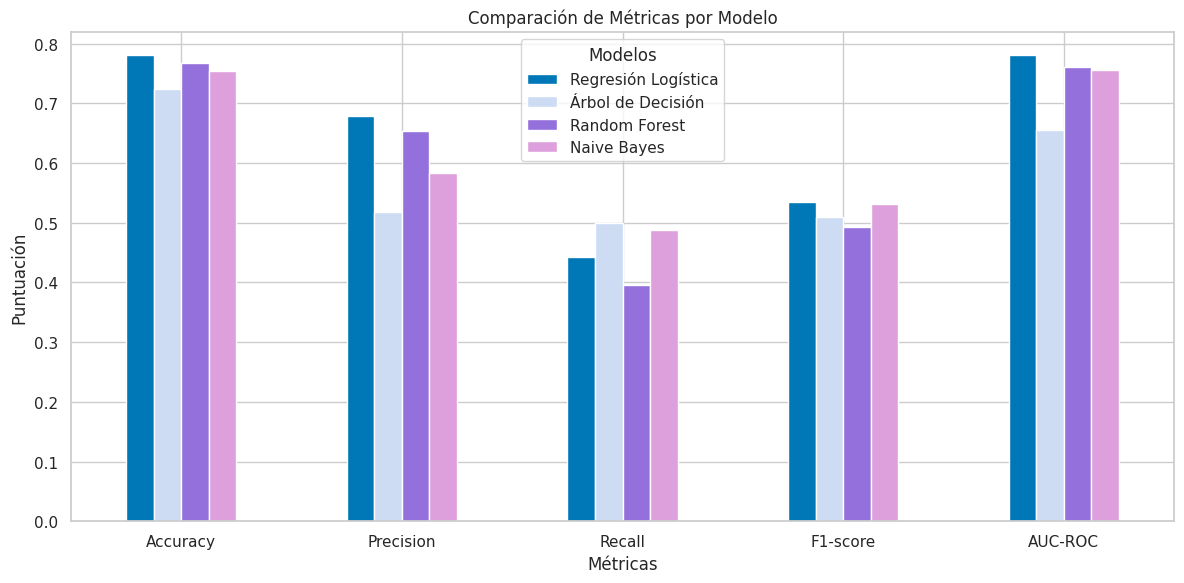

In [38]:
# Visualizamos los datos
visualiza_resultados()

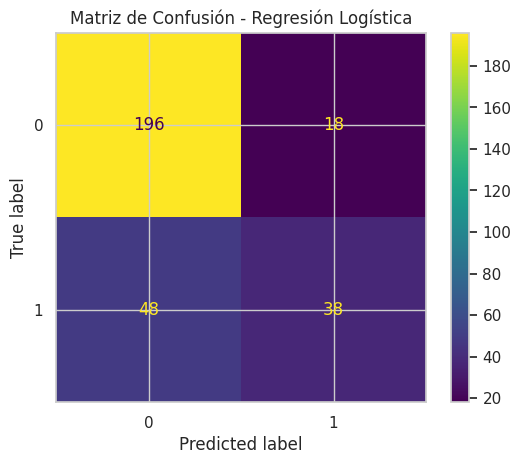

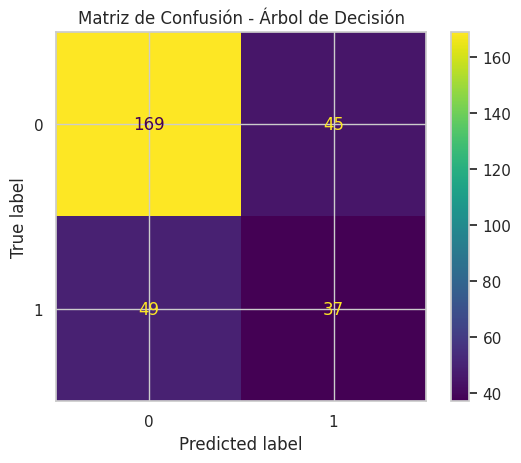

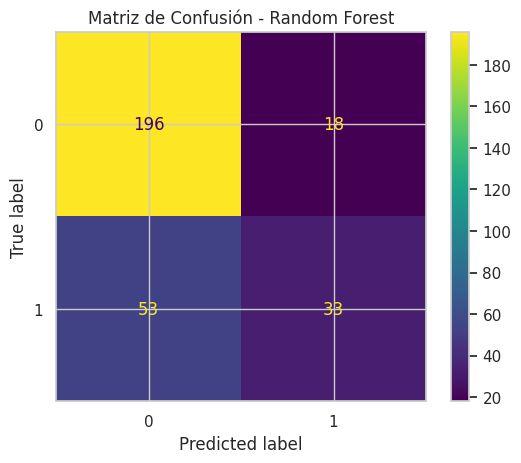

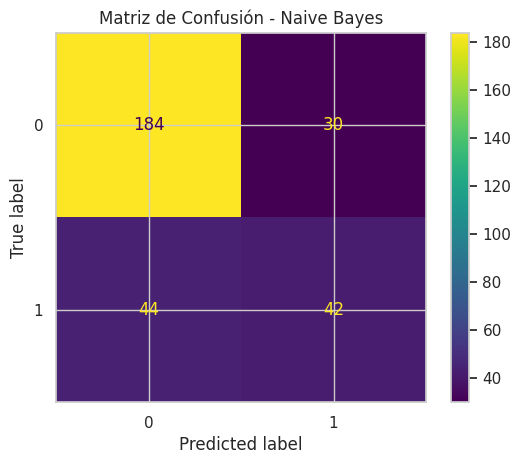

In [39]:
# Le realizamos también su matriz de confusión
evalua_crea_modelos(y2,x2)

In [40]:
# Se balancea también la variable target
x2_balanced, y2_balanced = balancea_target(y2,x2)
print("Distribución de clases original")
print(y2.value_counts())
print("Distribución de clases balanceadas después de SMOTE")
print(y2_balanced.value_counts())

Distribución de clases original
default
0    700
1    300
Name: count, dtype: int64
Distribución de clases balanceadas después de SMOTE
default
0    700
1    700
Name: count, dtype: int64


Regresión Logística
Accuracy: 0.7595238095238095
Precision: 0.7298578199052133
Recall: 0.7777777777777778
F1-score: 0.7530562347188264
AUC-ROC: 0.8193193193193193


Árbol de Decisión
Accuracy: 0.7404761904761905
Precision: 0.6960352422907489
Recall: 0.797979797979798
F1-score: 0.7435294117647059
AUC-ROC: 0.7444148694148693


Random Forest
Accuracy: 0.8023809523809524
Precision: 0.7555555555555555
Recall: 0.8585858585858586
F1-score: 0.8037825059101654
AUC-ROC: 0.8979433979433981


Naive Bayes
Accuracy: 0.75
Precision: 0.7123287671232876
Recall: 0.7878787878787878
F1-score: 0.7482014388489209
AUC-ROC: 0.8161570661570661




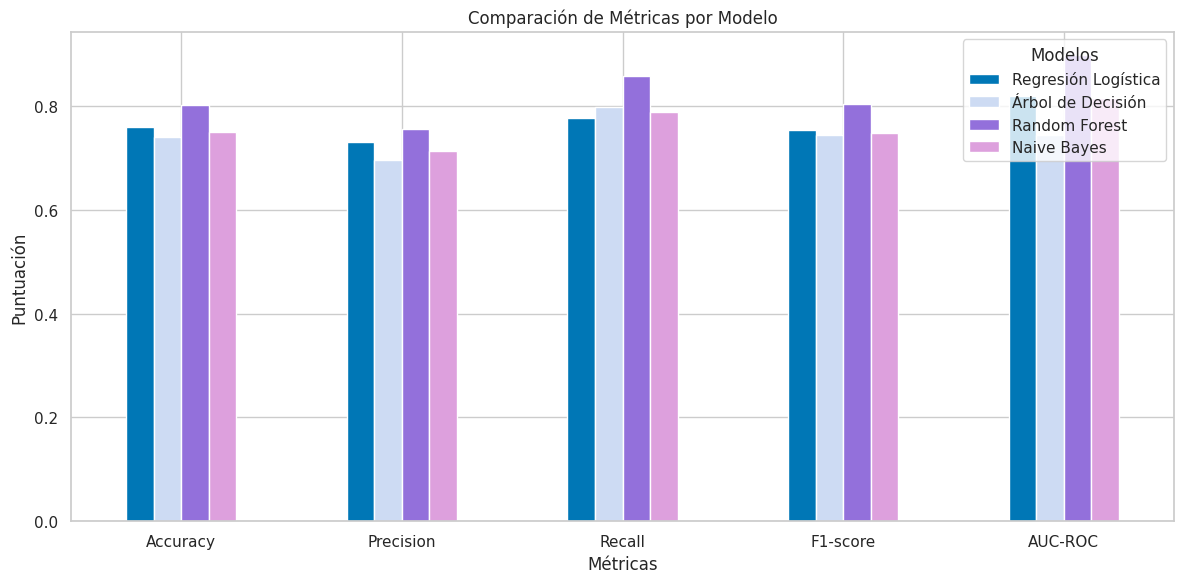

In [41]:
# Se le crean sus modelos y se visualizan
crea_modelos(y2_balanced,x2_balanced)
for i, model in enumerate(resultados['Model']):
  print(model)
  print(f'Accuracy: {resultados["Accuracy"][i]}')
  print(f'Precision: {resultados["Precision"][i]}')
  print(f'Recall: {resultados["Recall"][i]}')
  print(f'F1-score: {resultados["F1-score"][i]}')
  print(f'AUC-ROC: {resultados["AUC-ROC"][i]}')
  print('\n')

visualiza_resultados()

## Resultados


En esta sección abordaremos los 3 diferentes análisis realizados, donde se hablará de los resultados obtenidos de los diferentes modelos de machine learning:

1. El primer modelaje donde se realiza el estudio tomando en cuenta todos los campos y sin hacer un balance con el target (si es un buen cliente o no) podemos observar que el modelo que mejores resultados nos da es el de "Random Forest" seguido por el de "Regresión logística", donde ambos cuentan con resultados similares tanto en las métricas como en la Matriz de Confusión, siendo que su accuracy está cerca del 80% siendo 79% y 78% respectivamente y acertando correctamente en 199 y 196 casos de los 300 que se usan de prueba respectivamente, pero siendo ligeramente superior "Random Forest" en 3 de las 5 métricas. El modelo que peor sale parado sería el de "Árbol de Decisión" con un accuracy del 71% y acertando correctamente de 300 pruebas sólo 177.

2. Con el segundo modelaje donde la variable target ha sido balanceada, podemos observar como todos los modelos tienden a brindarnos respuestas en sus métricas muy similares sin tener tanto margen de separación entre ellos, pero aún así, el modelo "Random Forest" sigue manteniendo los mejores resultados, donde pasó de un 79% a un 80% de accuracy y superando a todos los demás modelos en los resultados de sus métricas.

3. Finalmente llegamos al último proceso de evaluación donde en lugar de tomar todos los campos sólo se realiza el modelaje con 12 campos y además se realiza el modelaje con el target desbalanceado y también balanceado, siendo estos sus resultados:

  3.1. Modelaje con el target sin balancear.
  
  Los resultados obtenidos para este modelaje, el modelo con mejores resultados sobre los demás es el de "Regresión logística", siendo solo superado en la métrica de sensibilidad (recall) pero logrando resaltarse en todas las demás obteniendo nuevamente un 78% de accuracy acertando en 196 casos de los 300 presentados, demostrando así cierta estabilidad del modelo en los casos donde la variable target no esta balanceada. Nuevamente podemos observar como el "peor" modelo sigue siendo "Árbol de Decisión" acertando solo 169 casos de los 300 con los que se trabajaron.
  
  3.2. Modelaje con el target balanceado.

  Aquí nuevamente el modelo "Random Forest" es quién termina siendo superior a los demás, arrojando resultados con un mejor desempeño en todas sus métricas sobre los demás modelos llegando nuevamente al 80% de accuracy y hasta un 85% de sensibilidad.



## Conclusión

Habiendo llegado al final así de este proyecto, habiendo realizado todo el preprocesamiento de nuestra base de datos y su modelaje para la decisión sobre que modelo de machine learning utilizar, podemos encontrarnos con varios puntos a resaltar que se tocarón ya en la sección de resultados, donde tomando en cuenta toda la información obtenida, el modelo de machine learning **"Random Forest"** es el modelo que mejor rendimiento y respuesta nos daría ante el proceso de seleccionar si un cliente sería bueno o no, siendo que este modelo es el que nos demostró en los diferentes casos como mantienen una estabilidad al momento de realizar su métricas e irle variando los diferentes casos, como lo son balancear o no el target, usar todos los campos disponibles o solo algunos, siendo que es el que más tiende a tener una mejor precisión estando generalmente en el 80%, mostrando así mucha fiabilidad, además de que en ambos casos donde se usaron todos los campos de la base de datos o sólo algunos, este acerto correctamente 2/3 del total, cumpliendo con el 66.6% correctamente. Así también, tenemos que hablar sobre el otro lado de la moneda donde **"Árbol de Decisión"** demostró tener los resultados más bajos en comparación con los otros modelos utilizados, siendo que si bien el modelo "Naive Bayes" obtenía resultados similares a este último, logró destacarse un poco más dejando así a este modelo como la peor opción de los 4 para ser utilizado.
